In [1]:
#Download and load dataset
import torch
from torchvision import datasets, transforms

#Defining transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

#Donwload and load the training data
trainset=datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #loads 64 images in each batch


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


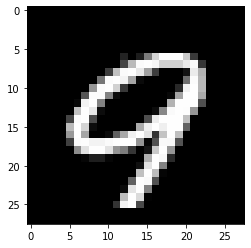

In [14]:
import matplotlib
matplotlib.pyplot.imshow(images[1].numpy().squeeze(), cmap='Greys_r',);

In [ ]:
#Sigmoid activation function
def activation(x):
    return 1/(1+torch.exp(-x))

In [ ]:
#Flattening the i/p images
inputs=images.view(images.shape[0], -1) #shape[0]=64, can use -1 or 784 to flatten out the other dimensions nd retain only batch size

#Create parameters
w1=torch.randn(784,256)
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

h=activation(torch.mm(inputs, w1) + b1)
out=torch.mm(h, w2) + b2
print(out.shape)
print(out)

In [ ]:
#Softmax function to print class probability
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)#torch.sum() takes the sum of all columns in each row
probabilities = softmax(out)
"""In the above func, numerator is 64,10 nd denominator torch.sum is just a 64 long vector...this function divides each
value in numerator by all 64 values in denom and output will be 64/64 whereas we need 64,10. so we reshape it to have 64 
rows and 1 elem in each row. Now each row in num is divided by single value in denom row. hence we get 64,10 tensor"""

#Does it have correct shape as (64,10)?
print(probabilities.shape)

#Does it sum up to 1?
print(probabilities.sum(dim=1))

In [ ]:
#Building the neural network using nn 

from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Input to hidden layer linear transformation
        self.hidden=nn.Linear(784,256) #Creates weights nd bias by itself
        #Output layer, 10 units- one for each digit
        self.output=nn.Linear(256,10)
        
        #define sigmoid activation and softmax output
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self, x):
        #Passing i/p tensor through each of the operations
        """x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)"""
        #This is cleaner code with functional definiton for sigmoid and softmaz
        #Hidden layer with sigmoid activation
        x=F.sigmoid(self.hidden(x))
        #Output layer with softmax activation
        x=F.softmax(self.output(x), dim=1)
        
        return x

In [ ]:
model = Network()
print(model)

In [5]:
#NEXT PROGRAM "USING BACKPROPAGATION AND CROSS ENTROPY LOSS"

In [29]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset=datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [30]:
#Building a feed forward network
model=nn.Sequential(nn.Linear(784,128), nn.ReLU(), nn.Linear(128,64),nn.ReLU(), nn.Linear(64,10)) #ReLU=Rectified Linear Unit activation function

criterion=nn.CrossEntropyLoss()

imag, label = next(iter(trainloader))
imag=imag.view(imag.shape[0], -1)

#Forward pass to get logits
logits=model(imag)

#Calculating loss with logits and labels
loss=criterion(logits, label)

print(loss)

tensor(2.3035, grad_fn=<NllLossBackward>)


In [31]:
#NEXT PROGRAM "FOR getting log_softmax activation function output"

In [32]:
model=nn.Sequential(nn.Linear(784,128), nn.ReLU(), nn.Linear(128,64),nn.ReLU(), nn.Linear(64,10), nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss() #Negative log likelihood loss

imag, label = next(iter(trainloader))
imag=imag.view(imag.shape[0], -1)

#Forward pass to get logits
logits=model(imag)

#Calculating loss with logits and labels
loss=criterion(logits, label)

print(loss)

tensor(2.3058, grad_fn=<NllLossBackward>)


In [ ]:
#PRACTICE PROGRAM FOR GRADIENT AND OPTIMISERS

In [33]:
print("Before backward pass:\n", model[0].weight.grad)#model[0] is for frst linear transformation i.e. Linear(784,128)
loss.backward()
print("After backward pass:\n", model[0].weight.grad)

Before backward pass:
 None
After backward pass:
 tensor([[-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0036, -0.0036, -0.0036,  ..., -0.0036, -0.0036, -0.0036],
        ...,
        [-0.0099, -0.0099, -0.0099,  ..., -0.0099, -0.0099, -0.0099],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0054, -0.0054, -0.0054,  ..., -0.0054, -0.0054, -0.0054]])


In [34]:
from torch import optim

#Optimizers require parameters of model that has to be optimised nd learning rate as arguments
optimizer = optim.SGD(model.parameters(), lr=0.01) #Stochastic Gradient Descent

In [38]:
print("Initial weights - \n", model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

#Clearing gradients cuz they might be accumulated
optimizer.zero_grad() #very important

#Forward pass, then backward pass, then update weights
output=model.forward(images)
loss=criterion(output, labels)
loss.backward()
print("Gradient - \n", model[0].weight.grad)

Initial weights - 
 Parameter containing:
tensor([[-0.0278,  0.0291, -0.0129,  ..., -0.0080,  0.0233,  0.0248],
        [ 0.0071, -0.0064,  0.0305,  ...,  0.0344,  0.0008, -0.0018],
        [ 0.0220, -0.0235, -0.0259,  ...,  0.0167,  0.0130, -0.0280],
        ...,
        [-0.0104,  0.0202, -0.0281,  ..., -0.0316, -0.0254, -0.0082],
        [ 0.0009,  0.0135, -0.0047,  ...,  0.0033,  0.0011, -0.0312],
        [ 0.0273,  0.0218, -0.0266,  ...,  0.0286,  0.0158, -0.0252]],
       requires_grad=True)
Gradient - 
 tensor([[-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        ...,
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006]])


In [40]:
#Weight updation STEP
optimizer.step()
print("Updated weights - \n", model[0].weight)

Updated weights - 
 Parameter containing:
tensor([[-0.0278,  0.0292, -0.0129,  ..., -0.0080,  0.0233,  0.0249],
        [ 0.0071, -0.0064,  0.0305,  ...,  0.0344,  0.0008, -0.0018],
        [ 0.0219, -0.0236, -0.0260,  ...,  0.0166,  0.0129, -0.0281],
        ...,
        [-0.0105,  0.0201, -0.0281,  ..., -0.0317, -0.0254, -0.0082],
        [ 0.0009,  0.0135, -0.0047,  ...,  0.0033,  0.0011, -0.0312],
        [ 0.0273,  0.0218, -0.0266,  ...,  0.0286,  0.0158, -0.0252]],
       requires_grad=True)


In [ ]:
#PRACTICE PROGRAMS ENDS HERE

In [ ]:
#FINAL PROGRAM FOR TRAINING PASS

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset=datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

model=nn.Sequential(nn.Linear(784,128), 
                    nn.ReLU(), 
                    nn.Linear(128,64),
                    nn.ReLU(), 
                    nn.Linear(64,10), 
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss() #Negative log likelihood loss
optimizer=optim.SGD(model.parameters(), lr=0.003) #Optimizer

epochs=5 #each pass through the entire training set is called epochs
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images=images.view(images.shape[0], -1) #Flattening MNIST images into a 784 long vector
        
        #TODO: training pass
        optimizer.zero_grad()
        
        output=model.forward(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)} ")

Training loss: 1.8303418678007146 
Training loss: 0.7772150211242724 
Training loss: 0.5052098759265342 
Training loss: 0.4237534903259928 
Training loss: 0.3837642736240491 


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

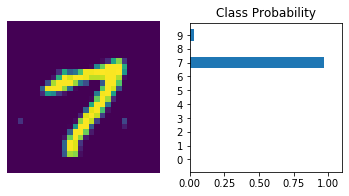

In [17]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img=images[63].view(1,784)
#Turn off gradients to speed up this part
with torch.no_grad():
    logits=model.forward(img)

#Output of the network are logits. we need to take softmax for probabilities
ps=F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps)